In [22]:
from transpile_benchy.interface import QASMBench, RedQueen
from transpile_benchy.interface import MQTBench


qasm_bench_s = QASMBench(size="small")

# redqueen = RedQueen()

from transpile_benchy.metrics import DepthMetric
from qiskit.circuit.library import iSwapGate

depth_metric = DepthMetric(basis_gate=iSwapGate().power(1 / 2))

from qiskit.transpiler import CouplingMap

# coupling_map = CouplingMap.from_grid(3,3)


# coupling_map = CouplingMap.from_heavy_hex(5)

from virtual_swap.pass_managers import SabreVS, SabreQiskit, QiskitLevel3

In [23]:
# metric for counting percent of accepted substitutions
from transpile_benchy.metrics import MetricInterface


class SubsMetric(MetricInterface):
    """Calculate the depth of a circuit."""

    def __init__(self):
        """Initialize the metric."""
        self.name = "accepted_subs"
        self.transpiler_pass = None

    def get_pass(self):
        """Return the pass associated with this metric."""
        return self.transpiler_pass

In [24]:
coupling_map = CouplingMap.from_line(9)
filter_list = ["toffoli", "fredkin"]
qasm_bench_m = QASMBench(size="small", filter_list=filter_list)
filter_list = ["\\bqaoa", "qft", "shor", "dj", "ae"]
mqt_bench = MQTBench(num_qubits=8, filter_list=filter_list)

In [25]:
# mqt = []
# mqt.append(MQTBench(num_qubits=16, filter_str="qaoa"))
# mqt.append(MQTBench(num_qubits=16, filter_str="qft"))
# mqt.append(MQTBench(num_qubits=16, filter_str="hhl"))

# coupling_map = CouplingMap.from_grid(4, 4)

In [26]:
# from qiskit.circuit.library import CXGate, iSwapGate
# from qiskit.extensions import UnitaryGate
# from weylchamber import canonical_gate
# from transpile_benchy.interface import QiskitFunctionInterface
# from qiskit.circuit.library import TwoLocal

# num_qubits = 8
# coupling_map = CouplingMap.from_line(num_qubits)
# # coupling_map = CouplingMap.from_grid(3, 3)

# def create_TwoLocal_function(
#     entanglement_blocks, entanglement_name, entanglement_type="full", reps=1
# ):
#     """Generates a function to create a TwoLocal object with given parameters"""

#     def TwoLocal_function(n_qubits):
#         return TwoLocal(n_qubits, "ry", entanglement_blocks, entanglement_type, reps)

#     TwoLocal_function.__name__ = (
#         # f"TwoLocal_{entanglement_type}_{entanglement_name}_{reps}reps"
#         f"TwoLocal-{entanglement_name}"
#     )
#     return TwoLocal_function


# def generate_interface_from_data(data, qubits_options):
#     """Generates a QiskitFunctionInterface from gate data and qubits options"""
#     gate, name = data
#     func = create_TwoLocal_function(gate, name)
#     return QiskitFunctionInterface(func, qubits_options)


# num_qubits_options = [num_qubits]  # Or any other options you'd like

# # Specify the gate blocks and their names
# entanglement_blocks_data = [
#     (CXGate(), r"$\texttt{CNOT}$"),
#     # (CXGate().power(1 / 2), r"$\sqrt{\texttt{CNOT}}$"),
#     # (iSwapGate(), r"$\texttt{iSWAP}$"),
#     (iSwapGate().power(1 / 2), r"$\sqrt{\texttt{iSWAP}}$"),
#     (UnitaryGate(canonical_gate(0.5, 0.25, 0.25).full()), r"$\texttt{ECP}$"),
# ]

# qiskit_functions_twolocal = [
#     generate_interface_from_data(data, num_qubits_options)
#     for data in entanglement_blocks_data
# ]

In [27]:
import logging
from transpile_benchy.benchmark import Benchmark

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
# transpile_benchy_logger.setLevel(logging.INFO)
transpile_benchy_logger.setLevel(logging.WARNING)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)

benchmark = Benchmark(
    transpilers=[
        # SabreQiskit(coupling_map, cx_basis=True),
        QiskitLevel3(coupling_map, cx_basis=True),
        SabreVS(coupling_map, cx_basis=True),
        # SabreQiskit(coupling_map),
        QiskitLevel3(coupling_map),
        SabreVS(coupling_map, logger=transpile_benchy_logger),
    ],
    # submodules=qiskit_functions_twolocal,
    # submodules=mqt,
    submodules=[qasm_bench_m, mqt_bench],
    # submodules=[mqt_bench],
    metrics=[depth_metric, SubsMetric()],
    logger=transpile_benchy_logger,
    num_runs=5,
)

# submodules=[qasm_bench_s],
# submodules=[mqt],
# submodules=[
# MQTBench(num_qubits=4, filter_str="qaoa"),
# # MQTBench(num_qubits=8, filter_str="qaoa"),
# # MQTBench(num_qubits=12, filter_str="qaoa"),
# # MQTBench(num_qubits=16, filter_str="qaoa"),
# ],

benchmark.run()

Running circuits for MQTBench:  83%|████████▎ | 5/6 [02:43<00:32, 32.71s/it]


In [28]:
# TODO filter add to results tracking, # number of added SWAPs, # of CNS subs
# remove the results if qiskit adds 0 SWAPS (can't be improved)
# reduce to a set of ~8 circuits at ~16Q scale....

In [29]:
# print(benchmark.results)

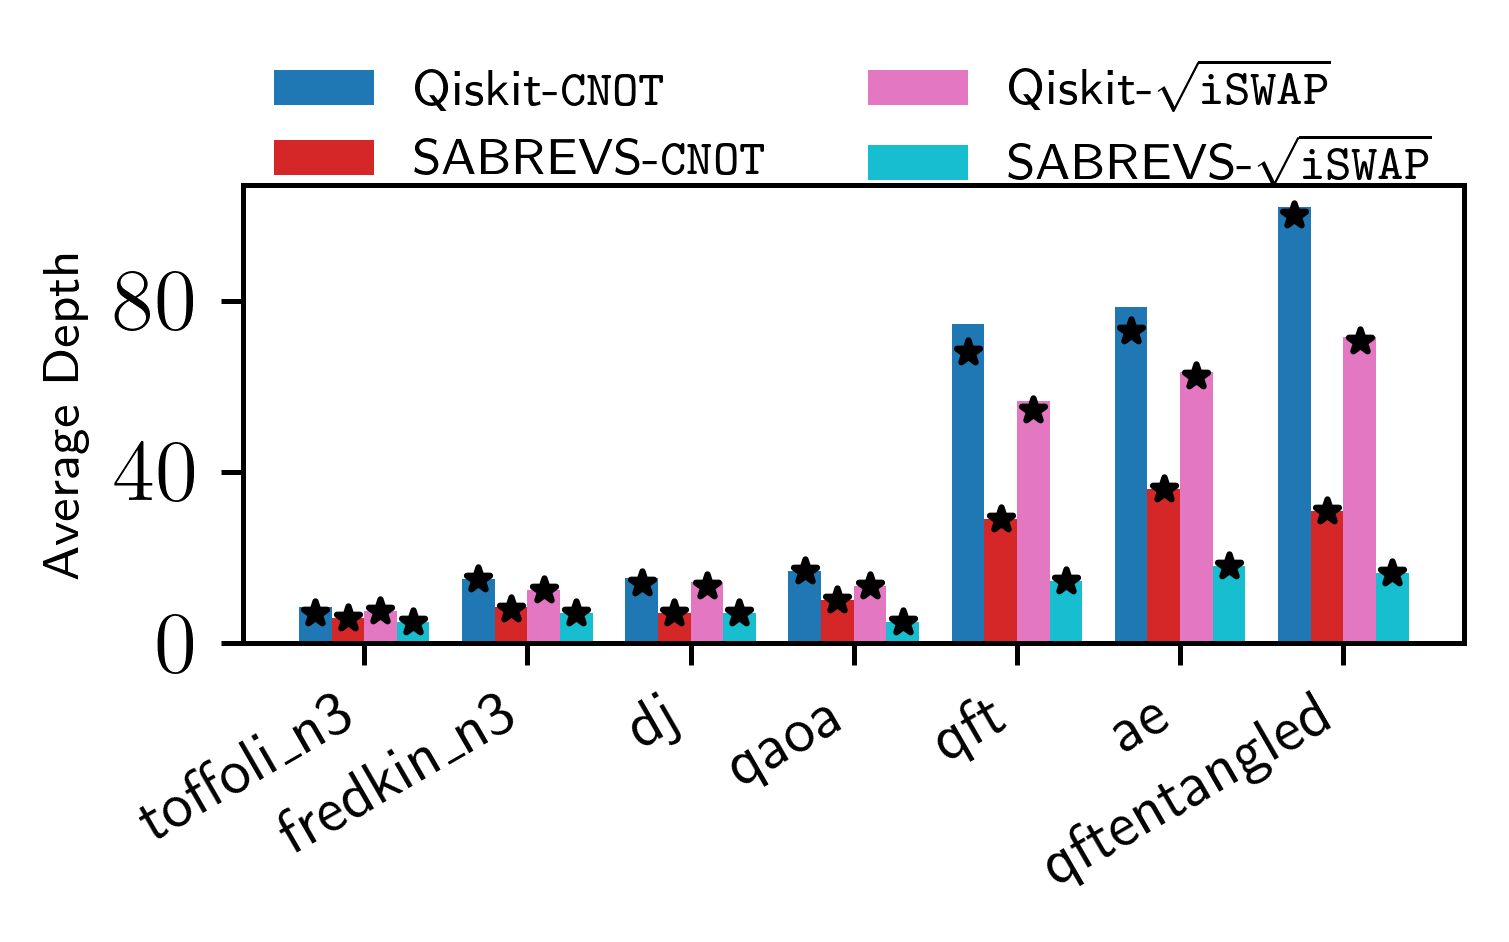

In [108]:
benchmark.plot(save=1, legend_show=1)

In [31]:
# from transpile_benchy.interface import QiskitFunctionInterface
# from qiskit.circuit.library import TwoLocal

# entanglement_types = ["linear", "full", "circular", "sca"]
# entanglement_types = ["full"] #, "reverse_linear"]


# def function_generator(entanglement_type):
#     def entanglement_function(n_qubits):
#         return TwoLocal(n_qubits, ["ry"], "cx", entanglement_type, reps=1)

#     entanglement_function.__name__ = f"TwoLocal_{entanglement_type}"
#     return entanglement_function


# num_qubits_options = [8]

# qiskit_functions_twolocal = [
#     QiskitFunctionInterface(function_generator(entanglement_type), num_qubits_options)
#     for entanglement_type in entanglement_types
# ]

# # 5Q backend = provider.backend.ibmq_quito
# # 20Q backend = provider.backend.ibmq_mumbai
# from typing import Callable, List
# from transpile_benchy.interface import QiskitFunctionInterface

# num_qubits = [8]  # , 20, 24, 28, 32, 36]
# from qiskit.circuit.library import QFT, QuantumVolume

# qiskit_functions_qft = QiskitFunctionInterface(QFT, num_qubits)
# qiskit_functions_qv = QiskitFunctionInterface(QuantumVolume, num_qubits)
# next(MQTBench(num_qubits=4, filter_str="qaoa").get_quantum_circuits()).draw('mpl', fold=-1)
# next(qasm_bench_m.get_quantum_circuits())

In [32]:
# from the literature
# toffoli
# fredkin
# EC codes
# Controlled phase
# QAOA
# Controlled phsae
# full entanling
# entanglemnt purification

# linaer, 2d, heavy-hex

# grover
# vqe
# bv
# qft
# qpe
# adder
# multipler
# sqn
# rd84
# co14
# sym9
# hub18
# shor26
# qaoa12
# tfim64
# tfxy64